###OLHEI O QUE FOI PEDIDO NO DESAFIO, E O NOSSO "AMIGO" RECOMENDOU SEPARAR O DESAFIO EM PARTES###

#Entendimento dos dados#
Analisaremos quaiis tabelas e colunas que poderão ser úteis no desafio



In [49]:
#DOWNLOADO DE DADOS PARA O COLAB E LEITURA DOS ARQUIVOS#

import pandas as pd
import glob
import os

# Definir os diretórios onde estão os arquivos
pastas = ['/content/icu', '/content/hosp']

# Criar um dicionário para armazenar os DataFrames
dados = {}

# Percorrer cada pasta e ler os arquivos
for pasta in pastas:
    arquivos_gz = glob.glob(os.path.join(pasta, "*.csv.gz"))  # Encontra todos os arquivos .csv.gz

    for arquivo in arquivos_gz:
        nome_tabela = os.path.basename(arquivo).replace('.csv.gz', '')  # Nome do arquivo sem extensão

        try:
            # Lendo o arquivo CSV compactado
            df = pd.read_csv(arquivo, compression='gzip')
            dados[nome_tabela] = df  # Armazena o DataFrame no dicionário

            print(f"Lido: {nome_tabela} ({df.shape[0]} linhas, {df.shape[1]} colunas)")

        except Exception as e:
            print(f"Erro ao ler {arquivo}: {e}")

# Verificar quais tabelas foram carregadas
print("\nTabelas carregadas:", list(dados.keys()))


Lido: caregiver (15468 linhas, 1 colunas)
Lido: inputevents (20404 linhas, 26 colunas)
Lido: chartevents (668862 linhas, 11 colunas)
Lido: outputevents (9362 linhas, 9 colunas)
Lido: procedureevents (1468 linhas, 22 colunas)
Lido: ingredientevents (25728 linhas, 17 colunas)
Lido: icustays (140 linhas, 8 colunas)
Lido: d_items (4014 linhas, 9 colunas)
Lido: datetimeevents (15280 linhas, 10 colunas)
Lido: d_icd_diagnoses (109775 linhas, 3 colunas)


<ipython-input-49-759e6f4e5e7f>:22: DtypeWarning: Columns (4,6,7,8,9,10,11,12,13,15,16,17,18,21,23,24,25,26,27,28,29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(arquivo, compression='gzip')


Lido: emar_detail (72018 linhas, 33 colunas)
Lido: microbiologyevents (2899 linhas, 25 colunas)
Lido: d_labitems (1622 linhas, 4 colunas)
Lido: poe (45154 linhas, 12 colunas)
Lido: prescriptions (18087 linhas, 21 colunas)
Lido: diagnoses_icd (4506 linhas, 5 colunas)
Lido: poe_detail (3795 linhas, 5 colunas)
Lido: labevents (107727 linhas, 16 colunas)
Lido: provider (40508 linhas, 1 colunas)
Lido: procedures_icd (722 linhas, 6 colunas)
Lido: d_hcpcs (89200 linhas, 4 colunas)
Lido: services (319 linhas, 5 colunas)
Lido: patients (100 linhas, 6 colunas)
Lido: transfers (1190 linhas, 7 colunas)
Lido: hcpcsevents (61 linhas, 6 colunas)
Lido: d_icd_procedures (85257 linhas, 3 colunas)
Lido: omr (2964 linhas, 5 colunas)
Lido: drgcodes (454 linhas, 7 colunas)
Lido: emar (35835 linhas, 12 colunas)
Lido: admissions (275 linhas, 16 colunas)
Lido: pharmacy (15306 linhas, 27 colunas)

Tabelas carregadas: ['caregiver', 'inputevents', 'chartevents', 'outputevents', 'procedureevents', 'ingredientevent

In [50]:
print(list(dados.keys()))  # Ver quais tabelas foram carregadas


['caregiver', 'inputevents', 'chartevents', 'outputevents', 'procedureevents', 'ingredientevents', 'icustays', 'd_items', 'datetimeevents', 'd_icd_diagnoses', 'emar_detail', 'microbiologyevents', 'd_labitems', 'poe', 'prescriptions', 'diagnoses_icd', 'poe_detail', 'labevents', 'provider', 'procedures_icd', 'd_hcpcs', 'services', 'patients', 'transfers', 'hcpcsevents', 'd_icd_procedures', 'omr', 'drgcodes', 'emar', 'admissions', 'pharmacy']


Tabelas carregadas: ['caregiver', 'inputevents', 'chartevents', 'outputevents', 'procedureevents', 'ingredientevents', 'icustays', 'd_items', 'datetimeevents', 'd_icd_diagnoses', 'emar_detail', 'microbiologyevents', 'd_labitems', 'poe', 'prescriptions', 'diagnoses_icd', 'poe_detail', 'labevents', 'provider', 'procedures_icd', 'd_hcpcs', 'services', 'patients', 'transfers', 'hcpcsevents', 'd_icd_procedures', 'omr', 'drgcodes', 'emar', 'admissions', 'pharmacy']
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10014729      F          21         2125       2011 - 2013         NaN
1    10003400      F          72         2134       2011 - 2013  2137-09-02
2    10002428      F          80         2155       2011 - 2013         NaN
3    10032725      F          38         2143       2011 - 2013  2143-03-30
4    10027445      F          48         2142       2011 - 2013  2146-02-09


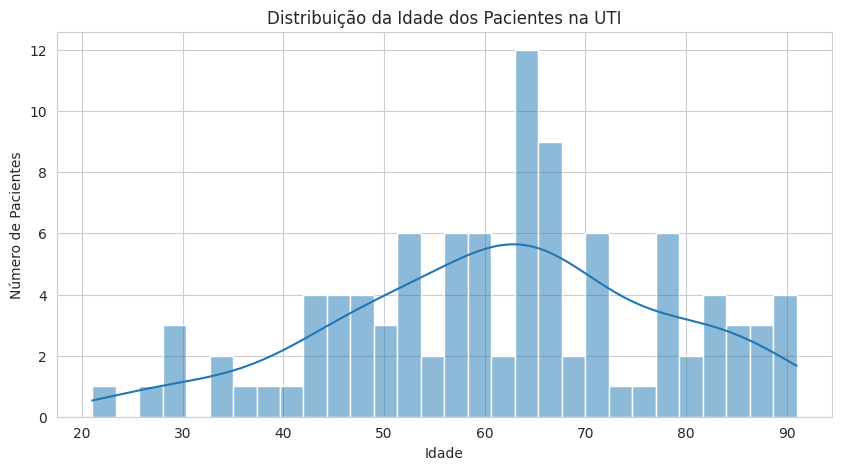

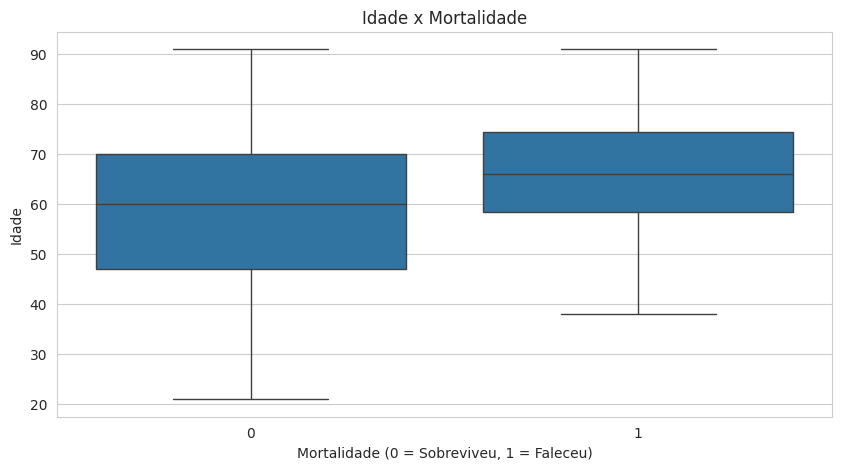

        count       mean        std   min   25%   50%   75%   max
morreu                                                           
0        69.0  59.492754  16.727595  21.0  47.0  60.0  70.0  91.0
1        31.0  66.774194  13.812337  38.0  58.5  66.0  74.5  91.0


In [51]:
#ANÁLISE DE EXEMPLO#

import matplotlib.pyplot as plt
import seaborn as sns

# Verificar quais tabelas temos
print("Tabelas carregadas:", list(dados.keys()))

# Olhar algumas linhas da tabela 'patients' (que contém informações dos pacientes)
if 'patients' in dados:
    df_pacientes = dados['patients']
    print(df_pacientes.head())
else:
    print("Tabela 'patients' não encontrada. Veja quais tabelas existem e escolha outra.")

# Vamos assumir que a idade dos pacientes está na coluna 'anchor_age' (verifique se esse é o nome correto)
if 'anchor_age' in df_pacientes.columns:

    # Plotar a distribuição da idade dos pacientes na UTI
    plt.figure(figsize=(10, 5))
    sns.histplot(df_pacientes['anchor_age'], bins=30, kde=True)
    plt.xlabel('Idade')
    plt.ylabel('Número de Pacientes')
    plt.title('Distribuição da Idade dos Pacientes na UTI')
    plt.show()

    # Analisar a relação entre idade e mortalidade
    if 'dod' in df_pacientes.columns:  # 'dod' é a data de óbito, se existir
        df_pacientes['morreu'] = df_pacientes['dod'].notna().astype(int)  # 1 = morreu, 0 = sobreviveu

        plt.figure(figsize=(10, 5))
        sns.boxplot(x=df_pacientes['morreu'], y=df_pacientes['anchor_age'])
        plt.xlabel('Mortalidade (0 = Sobreviveu, 1 = Faleceu)')
        plt.ylabel('Idade')
        plt.title('Idade x Mortalidade')
        plt.show()

        print(df_pacientes.groupby('morreu')['anchor_age'].describe())

    else:
        print("A coluna 'dod' (data de óbito) não foi encontrada. Verifique outra forma de identificar mortalidade.")
else:
    print("A coluna 'anchor_age' não foi encontrada. Verifique o nome correto da coluna de idade.")


#ANÁLISE EXPLORATÓRIA#
Analisaremos os dados de forma estatística, observando a relação entre fatores de risco e mortalidade

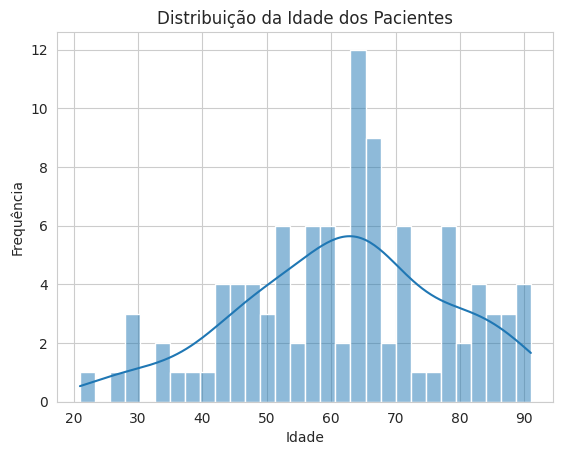

In [52]:
#Distribuição de idade dos pacientes#

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_pacientes['anchor_age'], bins=30, kde=True)
plt.title('Distribuição da Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


In [53]:
#Exemplo da relação entre sexo e mortalidade#

#ANÁLISES ESPECÍFICAS#
Explorar a relação entre vasopressores, ventilação mecânica e substituição renal com a mortalidade

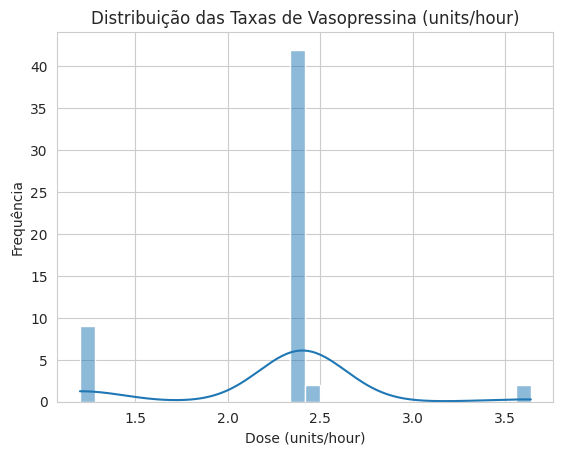

In [54]:
import pandas as pd

# Carregar a tabela 'inputevents' do dicionário de dados
df_inputevents = dados['inputevents']  # Substitua pelo nome correto, se necessário

# Filtrar apenas as linhas onde itemid = 222315 (Vasopressina)
df_vasopressina = df_inputevents[df_inputevents['itemid'] == 222315].copy()

# Criar a coluna vaso_rate convertendo unidades de 'units/min' para 'units/hour'
df_vasopressina['vaso_rate'] = df_vasopressina.apply(
    lambda row: row['rate'] * 60 if row['rateuom'] == 'units/min' else row['rate'],
    axis=1
)

# Selecionar apenas as colunas desejadas
df_vasopressina = df_vasopressina[['stay_id', 'linkorderid', 'vaso_rate', 'amount', 'starttime', 'endtime']]

# Exibir as primeiras linhas do DataFrame filtrado
df_vasopressina.head()

df_vasopressina.describe()

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_vasopressina['vaso_rate'], bins=30, kde=True)
plt.title("Distribuição das Taxas de Vasopressina (units/hour)")
plt.xlabel("Dose (units/hour)")
plt.ylabel("Frequência")
plt.show()


Index(['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'poe_seq',
       'order_provider_id', 'starttime', 'stoptime', 'drug_type', 'drug',
       'formulary_drug_cd', 'gsn', 'ndc', 'prod_strength', 'form_rx',
       'dose_val_rx', 'dose_unit_rx', 'form_val_disp', 'form_unit_disp',
       'doses_per_24_hrs', 'route'],
      dtype='object')
Pacientes que receberam vasopressores: 64
Taxa de mortalidade para pacientes que receberam vasopressores: 18.75%
Taxa de mortalidade para pacientes sem vasopressores: 1.42%


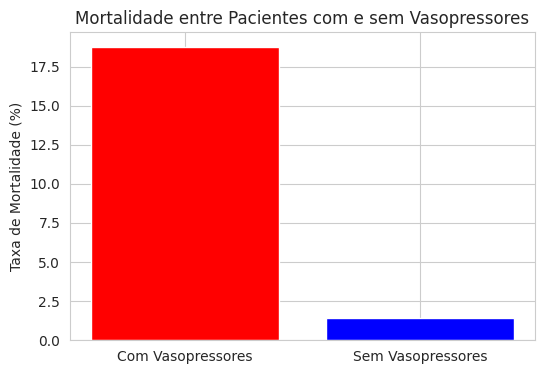

In [55]:
# PACIENTES QUE USARAM VASOPRESSORES ------------------------------------------------------->
# Verificar as colunas disponíveis na tabela prescriptions
print(dados['prescriptions'].columns)

# Filtrar vasopressores na tabela prescriptions
vasopressores = dados['prescriptions'][dados['prescriptions']['drug'].str.contains("norepinephrine|epinephrine|vasopressin|dopamine|phenylephrine", case=False, na=False)]

# Selecionar apenas IDs únicos de pacientes que receberam vasopressores
vasopressores_patients = vasopressores[['subject_id', 'hadm_id']].drop_duplicates()

print(f"Pacientes que receberam vasopressores: {vasopressores_patients.shape[0]}")

# ASSOCIAÇÃO COM MORTALIDADE ------------------------------------------------------->

# Mesclar pacientes que usaram vasopressores com a tabela de admissões
df_merged = vasopressores_patients.merge(dados['admissions'][['subject_id', 'hadm_id', 'hospital_expire_flag']], on=['subject_id', 'hadm_id'], how='left')

# Calcular a taxa de mortalidade entre pacientes que usaram vasopressores
mortality_rate = df_merged['hospital_expire_flag'].mean() * 100
print(f"Taxa de mortalidade para pacientes que receberam vasopressores: {mortality_rate:.2f}%")

# COMPARAÇÃO COM OS QUE NÃO USARAM ------------------------------------------------------->

# Pacientes que NÃO usaram vasopressores
no_vaso_patients = dados['admissions'][~dados['admissions']['hadm_id'].isin(vasopressores_patients['hadm_id'])]

# Calcular a taxa de mortalidade para pacientes sem vasopressores
no_vaso_mortality_rate = no_vaso_patients['hospital_expire_flag'].mean() * 100
print(f"Taxa de mortalidade para pacientes sem vasopressores: {no_vaso_mortality_rate:.2f}%")


# GRÁFICO COMPARATIVO ------------------------------------------------------->

import matplotlib.pyplot as plt

# Criar um gráfico de barras
labels = ['Com Vasopressores', 'Sem Vasopressores']
rates = [mortality_rate, no_vaso_mortality_rate]

plt.figure(figsize=(6,4))
plt.bar(labels, rates, color=['red', 'blue'])
plt.ylabel("Taxa de Mortalidade (%)")
plt.title("Mortalidade entre Pacientes com e sem Vasopressores")
plt.show()



In [56]:
# AJUSTE POR IDADES

# Unir informações de idade e comorbidades com os pacientes que usaram vasopressores
pacientes = dados['patients'][['subject_id', 'anchor_age']]  # Pegando a idade

# Filtrar apenas diagnósticos relevantes (ex: hipertensão, diabetes)
comorbidades = dados['diagnoses_icd'][['subject_id', 'icd_code']]
doencas_relevantes = ['4019', '25000']  # Hipertensão essencial, Diabetes mellitus tipo 2
comorbidades['tem_comorbidade'] = comorbidades['icd_code'].isin(doencas_relevantes).astype(int)
comorbidades = comorbidades.groupby('subject_id')['tem_comorbidade'].max().reset_index()

# Pegar a mortalidade e o uso de vasopressores
prescriptions = dados['prescriptions'][['subject_id', 'drug']]  # Pegando a prescrição de drogas
vasopressores = ['norepinephrine', 'epinephrine', 'dopamine', 'vasopressin']  # Principais vasopressores
prescriptions['usou_vasopressor'] = prescriptions['drug'].isin(vasopressores).astype(int)
prescriptions = prescriptions.groupby('subject_id')['usou_vasopressor'].max().reset_index()

# Pegar a mortalidade (da tabela admissions)
mortalidade = dados['admissions'][['subject_id', 'hospital_expire_flag']]

# Juntar todas as tabelas
df = pacientes.merge(comorbidades, on='subject_id', how='left')
df = df.merge(prescriptions, on='subject_id', how='left')
df = df.merge(mortalidade, on='subject_id', how='left')

# Substituir NaN por 0 em colunas booleanas
df.fillna({'tem_comorbidade': 0, 'usou_vasopressor': 0}, inplace=True)

# Mostrar os primeiros resultados
df.head()


<ipython-input-56-d9f0d57a7b30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comorbidades['tem_comorbidade'] = comorbidades['icd_code'].isin(doencas_relevantes).astype(int)
<ipython-input-56-d9f0d57a7b30>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prescriptions['usou_vasopressor'] = prescriptions['drug'].isin(vasopressores).astype(int)


,subject_id,anchor_age,tem_comorbidade,usou_vasopressor,hospital_expire_flag
0,10014729,21,0,0,0
1,10014729,21,0,0,0
2,10003400,72,1,0,1
3,10003400,72,1,0,0
4,10003400,72,1,0,0


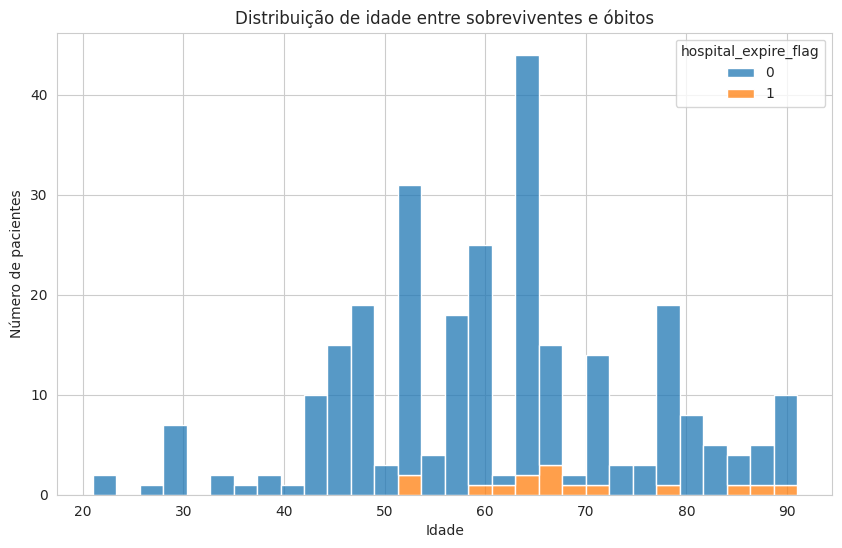

In [57]:
# USO DE VASOPRESSORES AJUSTADO POR IDADES E COMORBIDADES


import seaborn as sns
import matplotlib.pyplot as plt

# Criar gráfico de mortalidade por idade e uso de vasopressores
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='anchor_age', hue='hospital_expire_flag', bins=30, multiple='stack')
plt.title("Distribuição de idade entre sobreviventes e óbitos")
plt.xlabel("Idade")
plt.ylabel("Número de pacientes")
plt.show()

<ipython-input-58-5d3fc8b0bcf3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputevents['starttime'] = pd.to_datetime(inputevents['starttime'])
<ipython-input-58-5d3fc8b0bcf3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputevents['endtime'] = pd.to_datetime(inputevents['endtime'])
<ipython-input-58-5d3fc8b0bcf3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

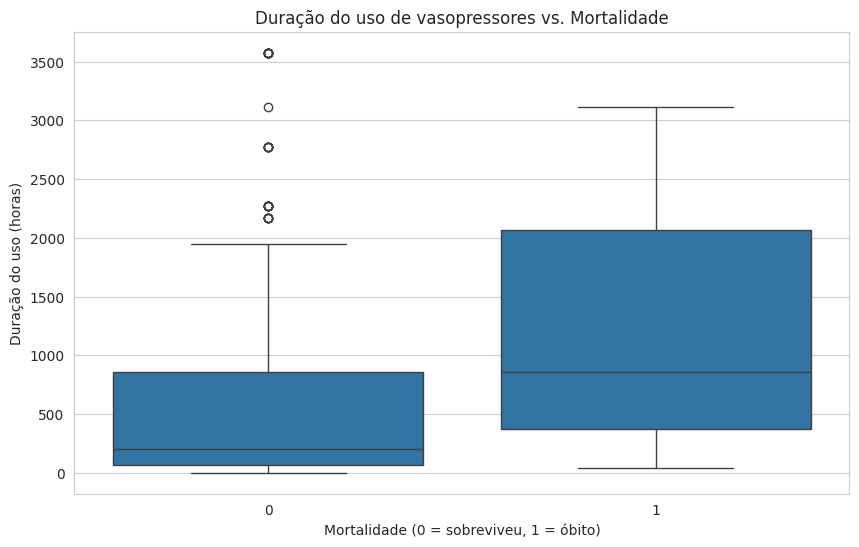

In [58]:
# DURAÇÃO DO USO DOS VASOPRESSORES

# Pegar apenas eventos de vasopressores na tabela inputevents
if 'inputevents' in dados:
    inputevents = dados['inputevents'][['subject_id', 'starttime', 'endtime', 'itemid']]

    # Converter para datetime
    inputevents['starttime'] = pd.to_datetime(inputevents['starttime'])
    inputevents['endtime'] = pd.to_datetime(inputevents['endtime'])

    # Calcular duração do uso (em horas)
    inputevents['duracao_horas'] = (inputevents['endtime'] - inputevents['starttime']).dt.total_seconds() / 3600

    # Juntar com os dados anteriores
    duracoes = inputevents.groupby('subject_id')['duracao_horas'].sum().reset_index()
    df = df.merge(duracoes, on='subject_id', how='left')
    df['duracao_horas'].fillna(0, inplace=True)  # Pacientes que não usaram vasopressores ficam com 0

    # Gráfico de duração vs. mortalidade
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='hospital_expire_flag', y='duracao_horas')
    plt.title("Duração do uso de vasopressores vs. Mortalidade")
    plt.xlabel("Mortalidade (0 = sobreviveu, 1 = óbito)")
    plt.ylabel("Duração do uso (horas)")
    plt.show()
else:
    print("Tabela 'inputevents' não encontrada na versão demo.")


In [59]:
# IMPACTO DE VASOPRESSORES ESPECÍFICOS


# Contar a mortalidade para cada vasopressor
df_vaso = dados['prescriptions'][['subject_id', 'drug']]
df_vaso = df_vaso[df_vaso['drug'].isin(vasopressores)]
df_vaso = df_vaso.merge(mortalidade, on='subject_id', how='left')

# Calcular taxa de mortalidade por vasopressor
df_vaso_grouped = df_vaso.groupby('drug')['hospital_expire_flag'].mean().reset_index()
df_vaso_grouped.columns = ['Vasopressor', 'Taxa de Mortalidade']

# Mostrar resultados
df_vaso_grouped.sort_values(by='Taxa de Mortalidade', ascending=False)


,Vasopressor,Taxa de Mortalidade


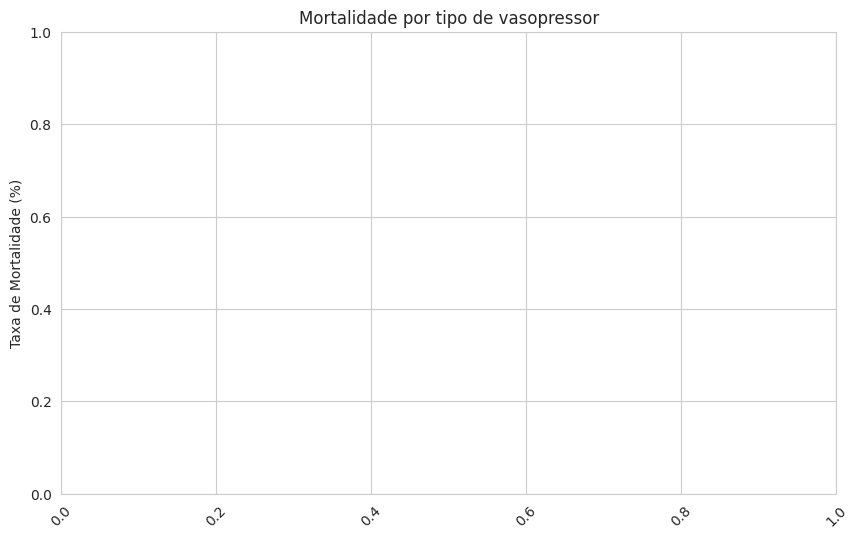

In [60]:
# DIFERENÇA ENTRE OS VASOPRESSORES

plt.figure(figsize=(10,6))
sns.barplot(data=df_vaso_grouped, x='Vasopressor', y='Taxa de Mortalidade')
plt.title("Mortalidade por tipo de vasopressor")
plt.xticks(rotation=45)
plt.ylabel("Taxa de Mortalidade (%)")
plt.show()

Taxa de mortalidade intra-UTI: 8.57%


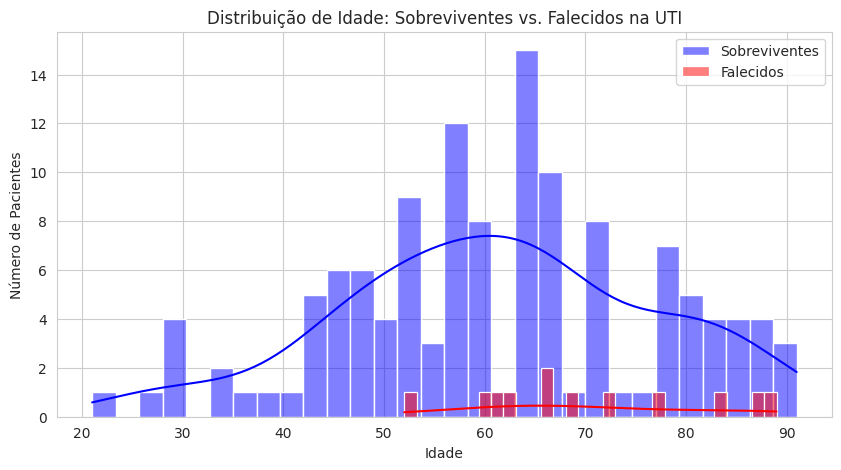

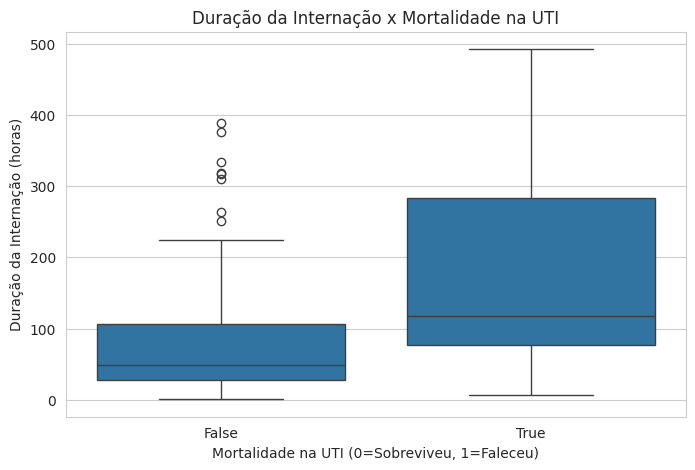

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas necessárias
df_icu = dados['icustays']  # Dados das internações na UTI
df_pacientes = dados['patients']  # Dados demográficos e data de óbito

# Converter colunas de data para o formato datetime
df_icu['intime'] = pd.to_datetime(df_icu['intime'])
df_icu['outtime'] = pd.to_datetime(df_icu['outtime'])
df_pacientes['dod'] = pd.to_datetime(df_pacientes['dod'])

# Unir as tabelas de UTI e pacientes
df_merged = df_icu.merge(df_pacientes, on='subject_id', how='left')

# Criar a coluna 'morreu_na_uti' (1 se morreu na UTI, 0 se sobreviveu)
df_merged['morreu_na_uti'] = (df_merged['dod'].notna()) & (df_merged['dod'] <= df_merged['outtime'])

# Calcular a taxa de mortalidade intra-UTI
taxa_mortalidade = df_merged['morreu_na_uti'].mean() * 100
print(f"Taxa de mortalidade intra-UTI: {taxa_mortalidade:.2f}%")

# Estatísticas descritivas dos pacientes falecidos na UTI
df_mortos = df_merged[df_merged['morreu_na_uti']]

# Distribuição de idade dos falecidos vs sobreviventes
plt.figure(figsize=(10, 5))
sns.histplot(df_merged[df_merged['morreu_na_uti'] == 0]['anchor_age'], label="Sobreviventes", kde=True, color='blue', bins=30)
sns.histplot(df_merged[df_merged['morreu_na_uti'] == 1]['anchor_age'], label="Falecidos", kde=True, color='red', bins=30)
plt.xlabel("Idade")
plt.ylabel("Número de Pacientes")
plt.title("Distribuição de Idade: Sobreviventes vs. Falecidos na UTI")
plt.legend()
plt.show()

# Boxplot do tempo de internação por mortalidade
df_merged['duracao_uti'] = (df_merged['outtime'] - df_merged['intime']).dt.total_seconds() / 3600  # Converter para horas
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['morreu_na_uti'], y=df_merged['duracao_uti'])
plt.xlabel("Mortalidade na UTI (0=Sobreviveu, 1=Faleceu)")
plt.ylabel("Duração da Internação (horas)")
plt.title("Duração da Internação x Mortalidade na UTI")
plt.show()


   subject_id   hadm_id   stay_id  \
0    10018328  23786647  31269608   
1    10020187  24104168  37509585   
2    10020187  26842957  32554129   
3    10012853  27882036  31338022   
4    10020740  25826145  32145159   

                                    first_careunit        last_careunit  \
0                                   Neuro Stepdown       Neuro Stepdown   
1  Neuro Surgical Intensive Care Unit (Neuro SICU)       Neuro Stepdown   
2                               Neuro Intermediate   Neuro Intermediate   
3                              Trauma SICU (TSICU)  Trauma SICU (TSICU)   
4                              Trauma SICU (TSICU)  Trauma SICU (TSICU)   

               intime             outtime       los gender  anchor_age  \
0 2154-04-24 23:03:44 2154-05-02 15:55:21  7.702512      F          83   
1 2169-01-15 04:56:00 2169-01-20 15:47:50  5.452662      F          63   
2 2170-02-24 18:18:46 2170-02-25 15:15:26  0.872685      F          63   
3 2176-11-26 02:34:49 2176-11-

<ipython-input-62-a6dd6ecf83eb>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_merged['gender'], palette='coolwarm')


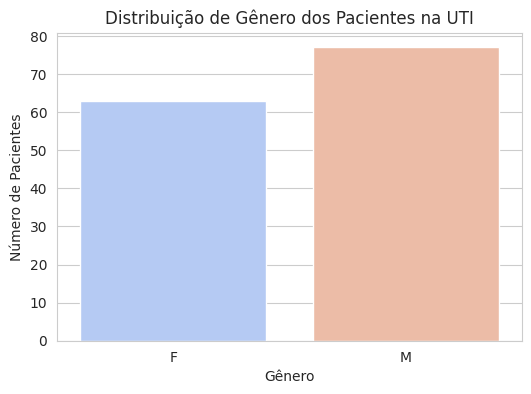

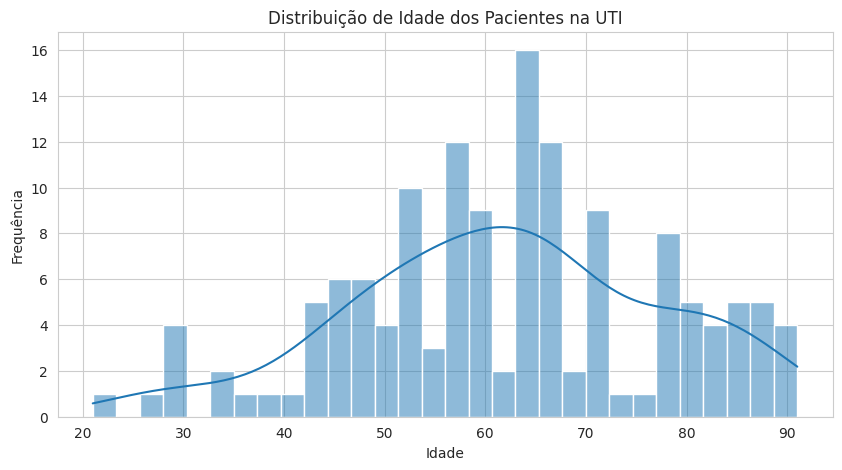

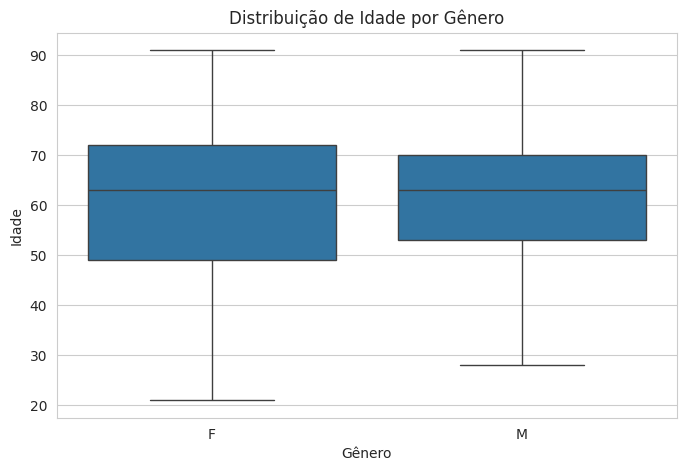

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas relevantes
df_icu = dados['icustays']  # Dados das internações na UTI
df_pacientes = dados['patients']  # Dados demográficos

# Unir os dados da UTI com os dados dos pacientes
df_merged = df_icu.merge(df_pacientes, on='subject_id', how='left')

# Ver as primeiras linhas para entender a estrutura dos dados
print(df_merged.head())

# Estatísticas descritivas das idades dos pacientes admitidos na UTI
print(df_merged[['anchor_age', 'gender']].describe())

# Contagem de pacientes por gênero
plt.figure(figsize=(6, 4))
sns.countplot(x=df_merged['gender'], palette='coolwarm')
plt.title("Distribuição de Gênero dos Pacientes na UTI")
plt.xlabel("Gênero")
plt.ylabel("Número de Pacientes")
plt.show()

# Distribuição de idade dos pacientes na UTI
plt.figure(figsize=(10, 5))
sns.histplot(df_merged['anchor_age'], bins=30, kde=True)
plt.title("Distribuição de Idade dos Pacientes na UTI")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Comparação de idade entre homens e mulheres na UTI
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged['gender'], y=df_merged['anchor_age'])
plt.title("Distribuição de Idade por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Idade")
plt.show()


Top 10 comorbidades dos pacientes internados na UTI:
long_title
Hypothyroidism, unspecified                               136
Hyperlipidemia, unspecified                               135
Acute kidney failure, unspecified                         128
Unspecified essential hypertension                        114
Long term (current) use of insulin                        100
Other and unspecified hyperlipidemia                       95
Anemia, unspecified                                        93
Obesity, unspecified                                       90
Major depressive disorder, single episode, unspecified     81
Essential (primary) hypertension                           80
Name: count, dtype: int64


<ipython-input-63-9259b36f5178>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_comorbidades.index, x=top_comorbidades.values, palette="viridis")


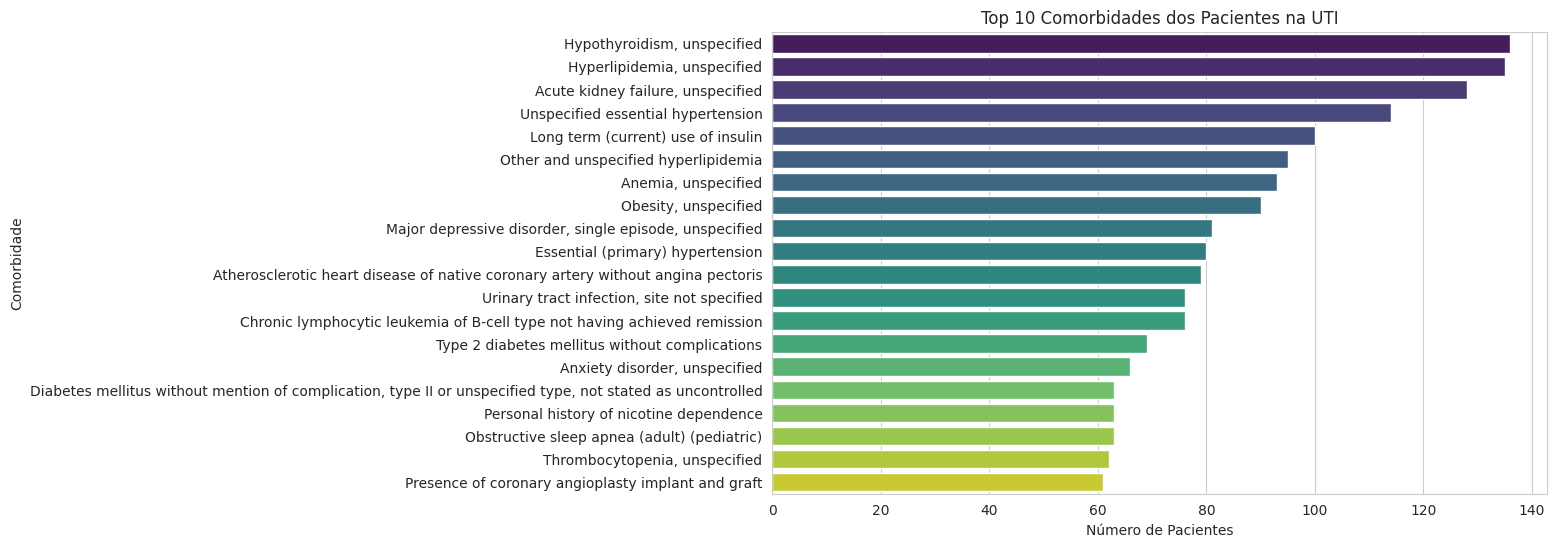

Top 10 comorbidades dos pacientes internados na UTI:
long_title
Hypothyroidism, unspecified                               136
Hyperlipidemia, unspecified                               135
Acute kidney failure, unspecified                         128
Unspecified essential hypertension                        114
Long term (current) use of insulin                        100
Other and unspecified hyperlipidemia                       95
Anemia, unspecified                                        93
Obesity, unspecified                                       90
Major depressive disorder, single episode, unspecified     81
Essential (primary) hypertension                           80
Name: count, dtype: int64


<ipython-input-63-9259b36f5178>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_comorbidades.index, x=top_comorbidades.values, palette="viridis")


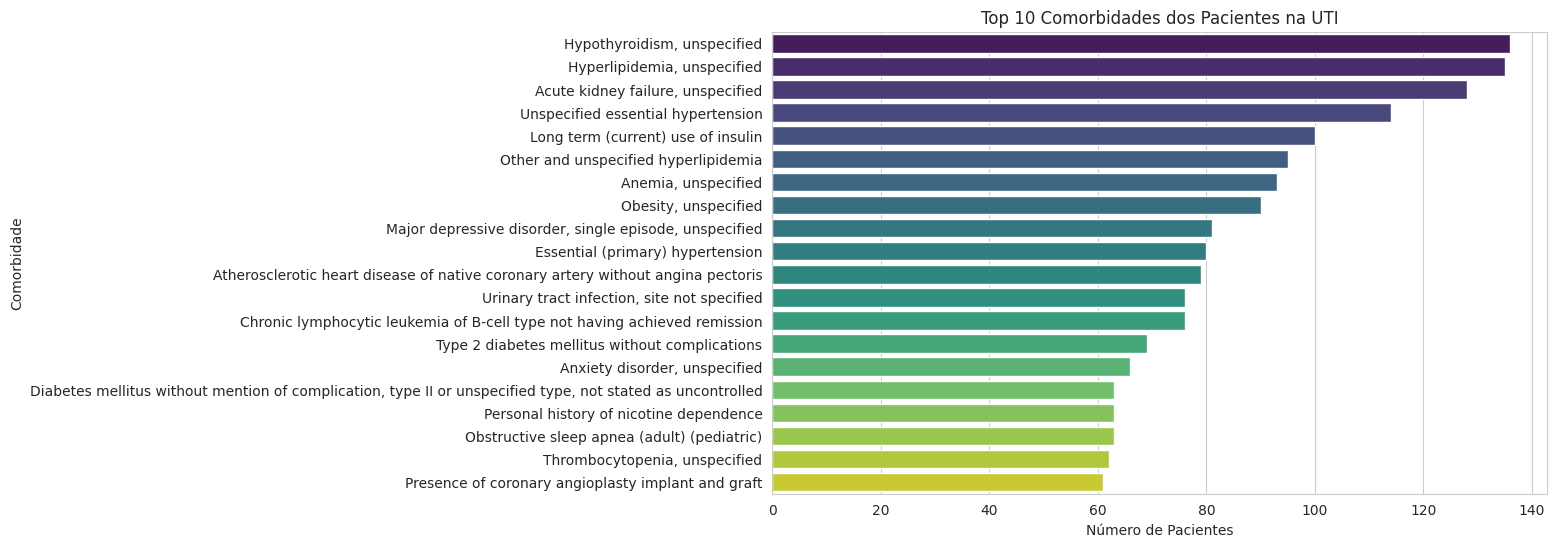

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas relevantes
df_icu = dados['icustays']  # Dados das internações na UTI
df_diag = dados['diagnoses_icd']  # Diagnósticos dos pacientes
df_icd_desc = dados['d_icd_diagnoses']  # Descrição dos códigos ICD

# Unir os dados da UTI com os diagnósticos
df_diag_icu = df_diag.merge(df_icu[['subject_id', 'stay_id']], on='subject_id', how='inner')

# Unir com a tabela de descrições de diagnósticos para obter os nomes das doenças
df_diag_icu = df_diag_icu.merge(df_icd_desc, on='icd_code', how='left')

# Contar os diagnósticos mais comuns na UTI
top_comorbidades = df_diag_icu['long_title'].value_counts().head(20)

# Exibir as 10 comorbidades mais comuns
print("Top 10 comorbidades dos pacientes internados na UTI:")
print(top_comorbidades.head(10))

# Plotar as 10 comorbidades mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(y=top_comorbidades.index, x=top_comorbidades.values, palette="viridis")
plt.title("Top 10 Comorbidades dos Pacientes na UTI")
plt.xlabel("Número de Pacientes")
plt.ylabel("Comorbidade")
plt.show()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas relevantes
df_icu = dados['icustays']  # Dados das internações na UTI
df_diag = dados['diagnoses_icd']  # Diagnósticos dos pacientes
df_icd_desc = dados['d_icd_diagnoses']  # Descrição dos códigos ICD

# Unir os dados da UTI com os diagnósticos
df_diag_icu = df_diag.merge(df_icu[['subject_id', 'stay_id']], on='subject_id', how='inner')

# Unir com a tabela de descrições de diagnósticos para obter os nomes das doenças
df_diag_icu = df_diag_icu.merge(df_icd_desc, on='icd_code', how='left')

# Contar os diagnósticos mais comuns na UTI
top_comorbidades = df_diag_icu['long_title'].value_counts().head(20)

# Exibir as 10 comorbidades mais comuns
print("Top 10 comorbidades dos pacientes internados na UTI:")
print(top_comorbidades.head(10))

# Plotar as 10 comorbidades mais comuns
plt.figure(figsize=(10, 6))
sns.barplot(y=top_comorbidades.index, x=top_comorbidades.values, palette="viridis")
plt.title("Top 10 Comorbidades dos Pacientes na UTI")
plt.xlabel("Número de Pacientes")
plt.ylabel("Comorbidade")
plt.show()


<Figure size 1200x600 with 0 Axes>

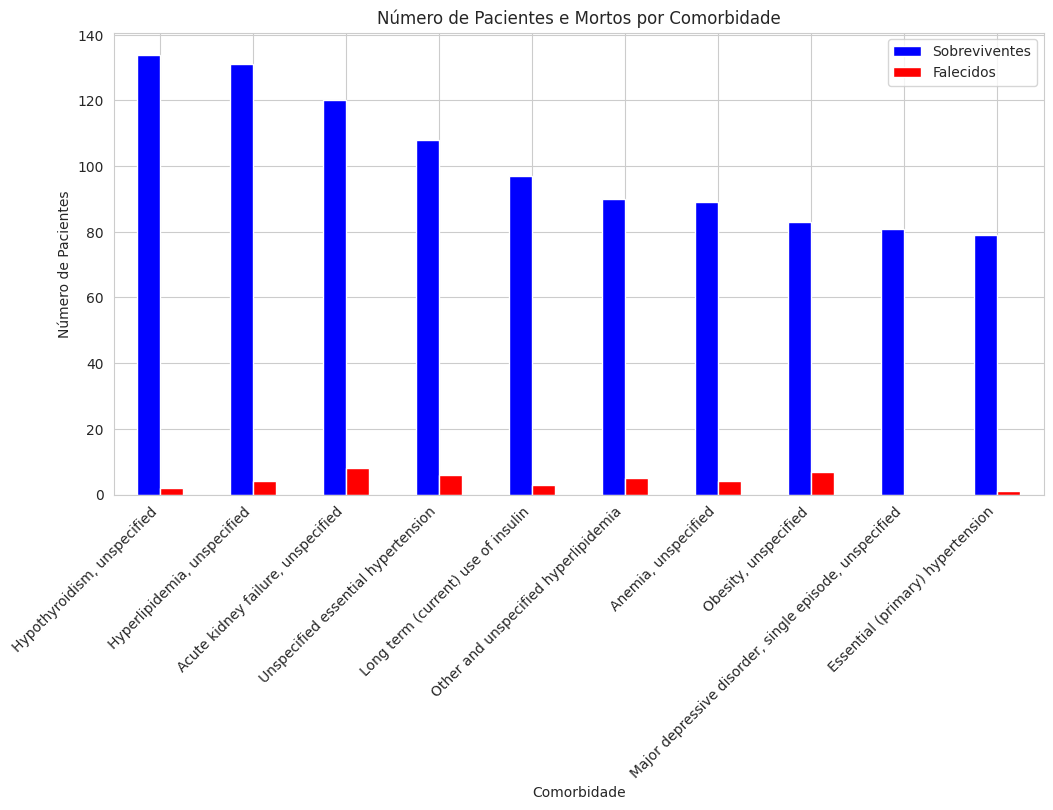

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar as tabelas necessárias
df_icu = dados['icustays']  # Dados das internações na UTI
df_diag = dados['diagnoses_icd']  # Diagnósticos dos pacientes
df_icd_desc = dados['d_icd_diagnoses']  # Descrição dos códigos ICD
df_pacientes = dados['patients']  # Dados demográficos e mortalidade

# Converter colunas de data para formato datetime
df_icu['intime'] = pd.to_datetime(df_icu['intime'])
df_icu['outtime'] = pd.to_datetime(df_icu['outtime'])
df_pacientes['dod'] = pd.to_datetime(df_pacientes['dod'])

# Criar a variável de mortalidade intra-UTI (morreu antes de sair da UTI)
df_icu = df_icu.merge(df_pacientes[['subject_id', 'dod']], on='subject_id', how='left')
df_icu['morreu_na_uti'] = (df_icu['dod'].notna()) & (df_icu['dod'] <= df_icu['outtime'])

# Unir os dados da UTI com os diagnósticos
df_diag_icu = df_diag.merge(df_icu[['subject_id', 'stay_id', 'morreu_na_uti']], on='subject_id', how='inner')

# Unir com a tabela de descrições dos diagnósticos
df_diag_icu = df_diag_icu.merge(df_icd_desc, on='icd_code', how='left')

# Contar a frequência de comorbidades entre os pacientes falecidos e sobreviventes
df_comorb_morte = df_diag_icu.groupby(['long_title', 'morreu_na_uti'])['subject_id'].count().reset_index()

# Pivotar os dados para facilitar a visualização
df_comorb_pivot = df_comorb_morte.pivot(index='long_title', columns='morreu_na_uti', values='subject_id').fillna(0)
df_comorb_pivot.columns = ['Sobreviventes', 'Falecidos']

# Calcular o total de pacientes por comorbidade
df_comorb_pivot['Total'] = df_comorb_pivot['Sobreviventes'] + df_comorb_pivot['Falecidos']

# Ordenar pelas comorbidades mais frequentes
df_comorb_pivot = df_comorb_pivot.sort_values(by='Total', ascending=False)

# Selecionar as 10 comorbidades mais comuns
top_comorbidades = df_comorb_pivot.head(10)

# Criar gráfico com barras agrupadas para mostrar o número total de pacientes e mortos
plt.figure(figsize=(12, 6))
top_comorbidades[['Sobreviventes', 'Falecidos']].plot(kind='bar', stacked=False, figsize=(12, 6), color=['blue', 'red'])

# Configurar rótulos e título
plt.xlabel("Comorbidade")
plt.ylabel("Número de Pacientes")
plt.title("Número de Pacientes e Mortos por Comorbidade")
plt.xticks(rotation=45, ha="right")
plt.legend(["Sobreviventes", "Falecidos"])
plt.show()


In [65]:
for nome, df in dados.items():
    print(f"Tabela: {nome}")
    print(df.columns.tolist())  # Exibe os nomes das colunas
    print("\n")


Tabela: caregiver
['caregiver_id']


Tabela: inputevents
['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime', 'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate', 'rateuom', 'orderid', 'linkorderid', 'ordercategoryname', 'secondaryordercategoryname', 'ordercomponenttypedescription', 'ordercategorydescription', 'patientweight', 'totalamount', 'totalamountuom', 'isopenbag', 'continueinnextdept', 'statusdescription', 'originalamount', 'originalrate']


Tabela: chartevents
['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime', 'storetime', 'itemid', 'value', 'valuenum', 'valueuom', 'warning']


Tabela: outputevents
['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'charttime', 'storetime', 'itemid', 'value', 'valueuom']


Tabela: procedureevents
['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime', 'endtime', 'storetime', 'itemid', 'value', 'valueuom', 'location', 'locationcategory', 'orderid', 'linkorderid', 'ordercategoryname', 'ordercat

In [66]:
print(dados['inputevents'].columns)

Index(['subject_id', 'hadm_id', 'stay_id', 'caregiver_id', 'starttime',
       'endtime', 'storetime', 'itemid', 'amount', 'amountuom', 'rate',
       'rateuom', 'orderid', 'linkorderid', 'ordercategoryname',
       'secondaryordercategoryname', 'ordercomponenttypedescription',
       'ordercategorydescription', 'patientweight', 'totalamount',
       'totalamountuom', 'isopenbag', 'continueinnextdept',
       'statusdescription', 'originalamount', 'originalrate'],
      dtype='object')


**PRINCIPAL**

Tabelas disponíveis: ['caregiver', 'inputevents', 'chartevents', 'outputevents', 'procedureevents', 'ingredientevents', 'icustays', 'd_items', 'datetimeevents', 'd_icd_diagnoses', 'emar_detail', 'microbiologyevents', 'd_labitems', 'poe', 'prescriptions', 'diagnoses_icd', 'poe_detail', 'labevents', 'provider', 'procedures_icd', 'd_hcpcs', 'services', 'patients', 'transfers', 'hcpcsevents', 'd_icd_procedures', 'omr', 'drgcodes', 'emar', 'admissions', 'pharmacy']


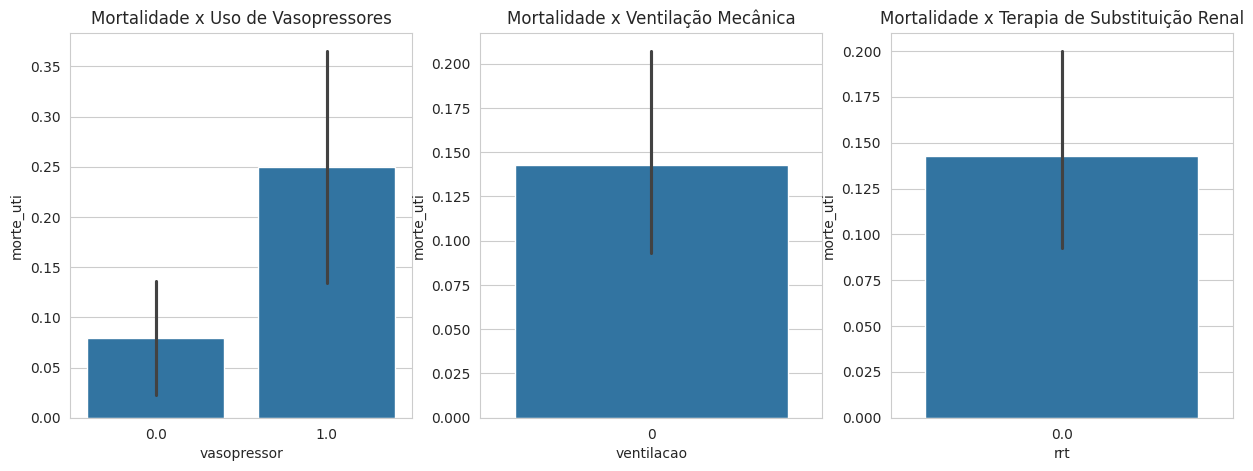

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar quais tabelas já foram carregadas
disponiveis = list(dados.keys())
print("Tabelas disponíveis:", disponiveis)

# 1. Identificação da Mortalidade intra-UTI
df_icustays = dados.get('icustays', pd.DataFrame())
df_admissions = dados.get('admissions', pd.DataFrame())

# Pegando a informação de óbito no hospital
df_mortalidade = df_admissions[['hadm_id', 'hospital_expire_flag']]
df_icustays = df_icustays.merge(df_mortalidade, on='hadm_id', how='left')

df_icustays['morte_uti'] = df_icustays['hospital_expire_flag'].fillna(0).astype(int)

# 2. Identificação do Uso de Vasopressores
vasopressores = ['dopamine', 'epinephrine', 'norepinephrine', 'phenylephrine', 'vasopressin']
df_med = dados.get('inputevents', pd.DataFrame())

if not df_med.empty:
    # Carregar a tabela de itens para obter os nomes dos medicamentos
    df_items = dados.get('d_items', pd.DataFrame())

    # Verificar se d_items tem as colunas corretas
    if 'itemid' in df_items.columns and 'label' in df_items.columns:
        # Criar um dicionário de mapeamento itemid -> nome do medicamento
        itemid_to_drug = df_items.set_index('itemid')['label'].to_dict()

        # Aplicar esse mapeamento ao inputevents
        df_med['drug_name'] = df_med['itemid'].map(itemid_to_drug)

        # Criar a coluna vasopressor
        vasopressores = ['dopamine', 'epinephrine', 'norepinephrine', 'phenylephrine', 'vasopressin']
        df_med['vasopressor'] = df_med['drug_name'].apply(lambda x: 1 if str(x).lower() in vasopressores else 0)

        df_pacientes_vasopressor = df_med.groupby('stay_id')['vasopressor'].max().reset_index()
    else:
        print("A tabela d_items não contém as colunas esperadas ('itemid', 'label'). Verifique os dados disponíveis.")
        df_pacientes_vasopressor = pd.DataFrame(columns=['stay_id', 'vasopressor'])
else:
    df_pacientes_vasopressor = pd.DataFrame(columns=['stay_id', 'vasopressor'])

# 3. Identificação do Uso de Ventilação Mecânica
df_vent = dados.get('chartevents', pd.DataFrame())
df_items = dados.get('d_items', pd.DataFrame())  # Para mapear os nomes dos eventos

if not df_vent.empty and not df_items.empty:
    # Criar um dicionário de mapeamento itemid -> nome do evento
    itemid_to_name = df_items.set_index('itemid')['label'].to_dict()

    # Mapear os nomes no chartevents
    df_vent['event_name'] = df_vent['itemid'].map(itemid_to_name)

    # Criar a coluna de ventilação
    df_vent['ventilacao'] = df_vent['event_name'].apply(lambda x: 1 if x and 'ventilation' in x.lower() else 0)

    df_pacientes_ventilacao = df_vent.groupby('stay_id')['ventilacao'].max().reset_index()
else:
    print("Erro: Tabela 'chartevents' ou 'd_items' vazia. Não foi possível identificar ventilação mecânica.")
    df_pacientes_ventilacao = pd.DataFrame(columns=['stay_id', 'ventilacao'])


# 4. Identificação de Terapia de Substituição Renal (TSR)
df_rrt = dados.get('procedureevents', pd.DataFrame())
df_items = dados.get('d_items', pd.DataFrame())  # Para mapear os nomes dos procedimentos

if not df_rrt.empty and not df_items.empty:
    # Criar um dicionário de mapeamento itemid -> nome do evento
    itemid_to_name = df_items.set_index('itemid')['label'].to_dict()

    # Mapear os nomes no procedureevents
    df_rrt['event_name'] = df_rrt['itemid'].map(itemid_to_name)

    # Criar a coluna de TSR
    df_rrt['rrt'] = df_rrt['event_name'].apply(lambda x: 1 if x and 'renal replacement' in x.lower() else 0)

    df_pacientes_rrt = df_rrt.groupby('stay_id')['rrt'].max().reset_index()
else:
    print("Erro: Tabela 'procedureevents' ou 'd_items' vazia. Não foi possível identificar TSR.")
    df_pacientes_rrt = pd.DataFrame(columns=['stay_id', 'rrt'])


# 5. Unindo os dados para análise
df_final = df_icustays[['stay_id', 'morte_uti']]
df_final = df_final.merge(df_pacientes_vasopressor, on='stay_id', how='left')
df_final = df_final.merge(df_pacientes_ventilacao, on='stay_id', how='left')
df_final = df_final.merge(df_pacientes_rrt, on='stay_id', how='left')
df_final.fillna(0, inplace=True)

# Gráficos de análise
sns.set_style("whitegrid")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='vasopressor', y='morte_uti', data=df_final)
plt.title("Mortalidade x Uso de Vasopressores")

plt.subplot(1, 3, 2)
sns.barplot(x='ventilacao', y='morte_uti', data=df_final)
plt.title("Mortalidade x Ventilação Mecânica")

plt.subplot(1, 3, 3)
sns.barplot(x='rrt', y='morte_uti', data=df_final)
plt.title("Mortalidade x Terapia de Substituição Renal")

plt.show()


In [68]:
print(df.columns)


Index(['subject_id', 'hadm_id', 'pharmacy_id', 'poe_id', 'starttime',
       'stoptime', 'medication', 'proc_type', 'status', 'entertime',
       'verifiedtime', 'route', 'frequency', 'disp_sched', 'infusion_type',
       'sliding_scale', 'lockout_interval', 'basal_rate', 'one_hr_max',
       'doses_per_24_hrs', 'duration', 'duration_interval', 'expiration_value',
       'expiration_unit', 'expirationdate', 'dispensation', 'fill_quantity'],
      dtype='object')


MORTALIDADE DENTRO E FORA DA UTI + APÓS 1 ANO

In [69]:
print(df_patients.columns.tolist())

['subject_id', 'dod']


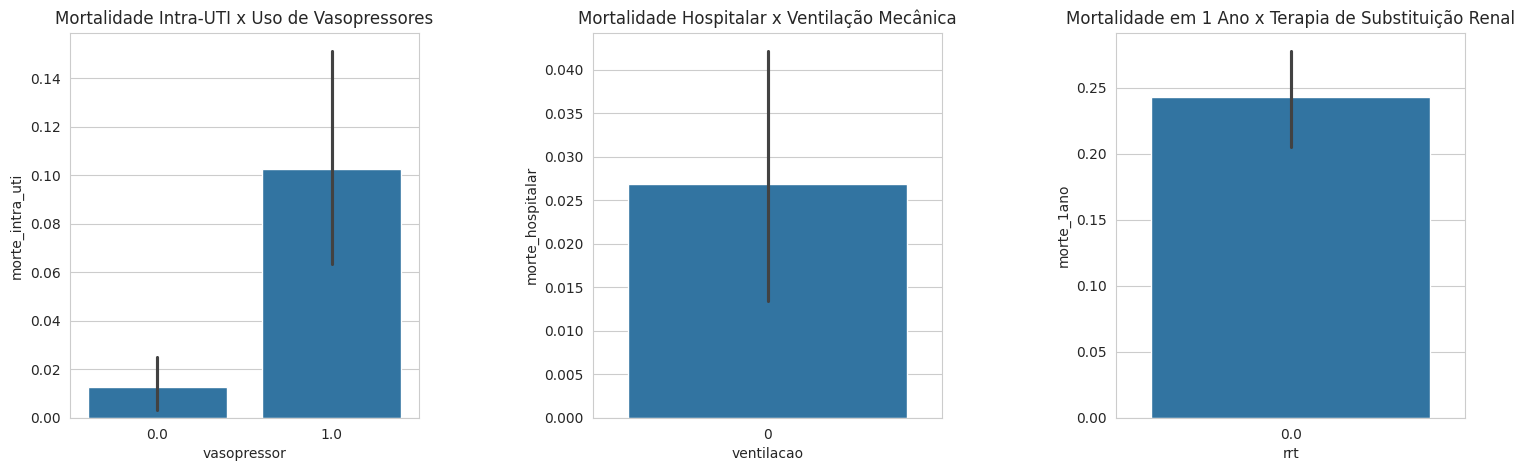

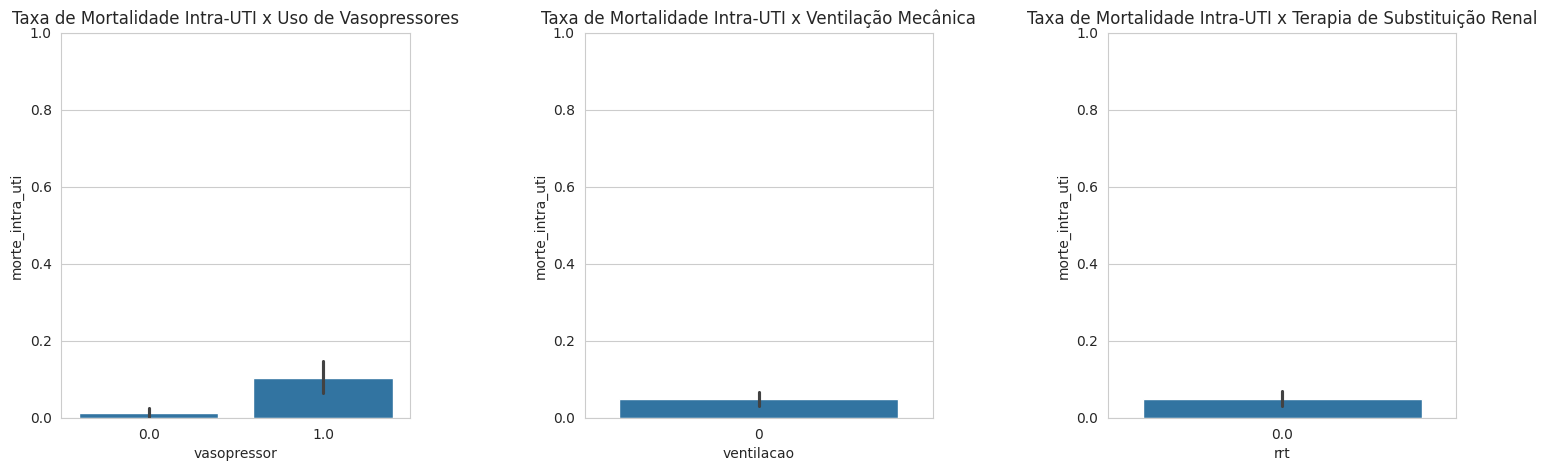

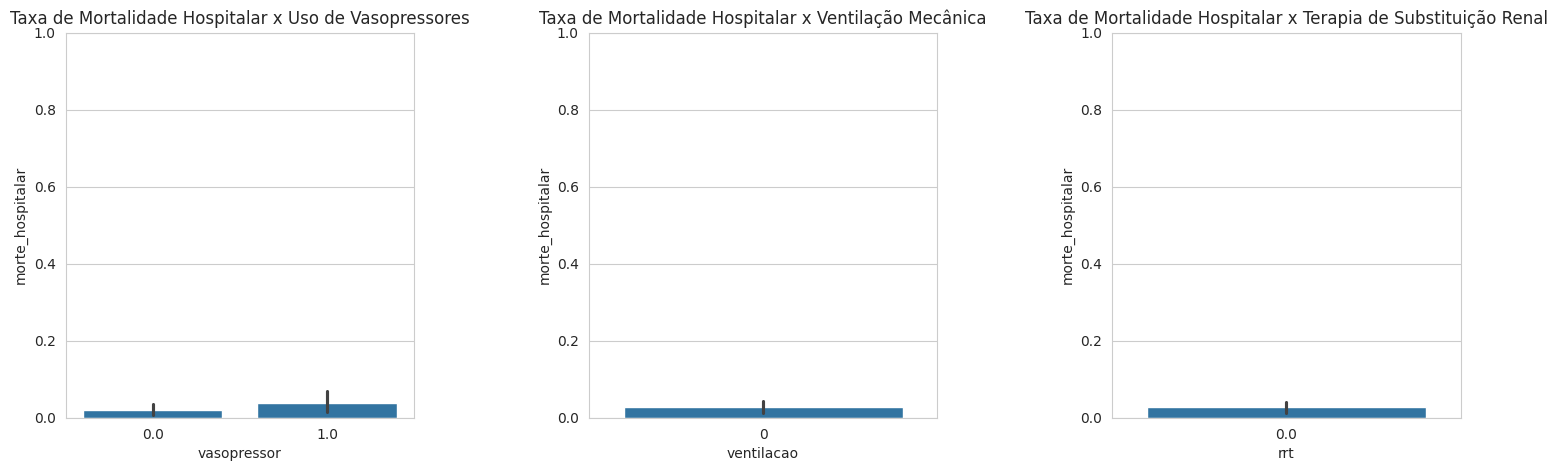

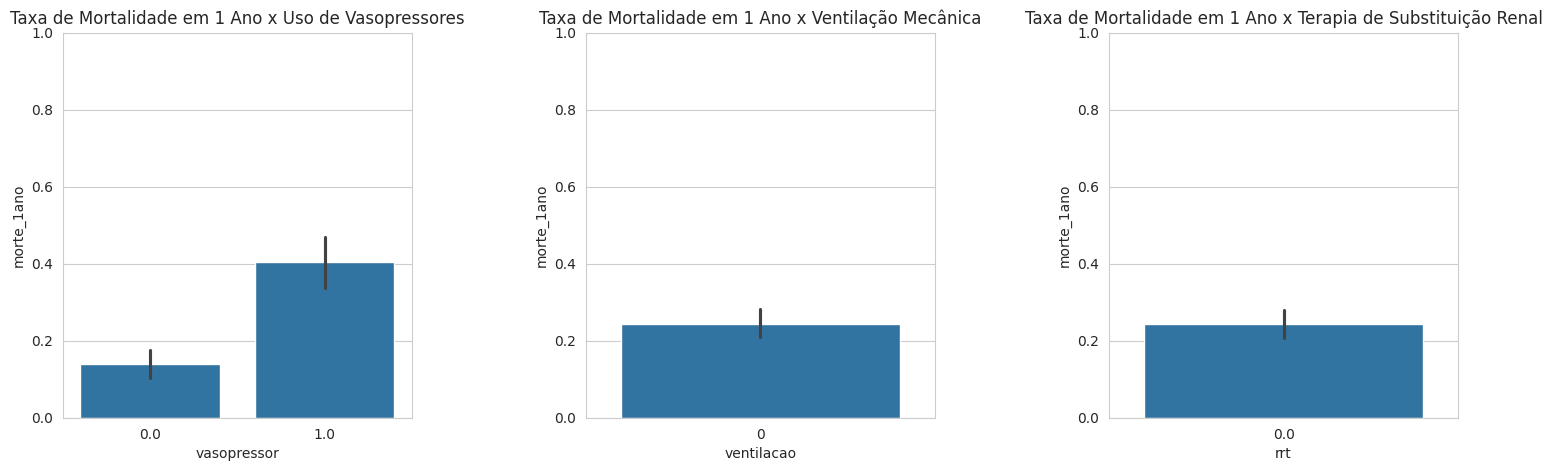

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar gráficos para cada tipo de mortalidade
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Aumentado o tamanho da figura
plt.subplots_adjust(wspace=0.5)  # Aumentando a distância lateral entre os gráficos

sns.barplot(x='vasopressor', y='morte_intra_uti', data=df_final, ax=axes[0])
axes[0].set_title("Mortalidade Intra-UTI x Uso de Vasopressores")

sns.barplot(x='ventilacao', y='morte_hospitalar', data=df_final, ax=axes[1])
axes[1].set_title("Mortalidade Hospitalar x Ventilação Mecânica")

sns.barplot(x='rrt', y='morte_1ano', data=df_final, ax=axes[2])
axes[2].set_title("Mortalidade em 1 Ano x Terapia de Substituição Renal")

plt.show()

# Criar gráficos adicionais para a taxa de mortalidade intra-UTI
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Aumentado o tamanho da figura
plt.subplots_adjust(wspace=0.5)  # Aumentando a distância lateral entre os gráficos

sns.barplot(x='vasopressor', y='morte_intra_uti', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[0])
axes[0].set_ylim(0, 1)  # Normalizar para proporção (entre 0 e 1)
axes[0].set_title("Taxa de Mortalidade Intra-UTI x Uso de Vasopressores")

sns.barplot(x='ventilacao', y='morte_intra_uti', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title("Taxa de Mortalidade Intra-UTI x Ventilação Mecânica")

sns.barplot(x='rrt', y='morte_intra_uti', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[2])
axes[2].set_ylim(0, 1)
axes[2].set_title("Taxa de Mortalidade Intra-UTI x Terapia de Substituição Renal")

plt.show()

# Criar gráficos adicionais para a taxa de mortalidade hospitalar
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Aumentado o tamanho da figura
plt.subplots_adjust(wspace=0.5)  # Aumentando a distância lateral entre os gráficos

sns.barplot(x='vasopressor', y='morte_hospitalar', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_title("Taxa de Mortalidade Hospitalar x Uso de Vasopressores")

sns.barplot(x='ventilacao', y='morte_hospitalar', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title("Taxa de Mortalidade Hospitalar x Ventilação Mecânica")

sns.barplot(x='rrt', y='morte_hospitalar', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[2])
axes[2].set_ylim(0, 1)
axes[2].set_title("Taxa de Mortalidade Hospitalar x Terapia de Substituição Renal")

plt.show()

# Criar gráficos adicionais para a taxa de mortalidade em 1 ano
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Aumentado o tamanho da figura
plt.subplots_adjust(wspace=0.5)  # Aumentando a distância lateral entre os gráficos

sns.barplot(x='vasopressor', y='morte_1ano', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_title("Taxa de Mortalidade em 1 Ano x Uso de Vasopressores")

sns.barplot(x='ventilacao', y='morte_1ano', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title("Taxa de Mortalidade em 1 Ano x Ventilação Mecânica")

sns.barplot(x='rrt', y='morte_1ano', data=df_final, estimator=lambda x: sum(x)/len(x), ax=axes[2])
axes[2].set_ylim(0, 1)
axes[2].set_title("Taxa de Mortalidade em 1 Ano x Terapia de Substituição Renal")

plt.show()


#MODELAGEM#
Criar um modelo preditivo de mortalidade